BÀI LÀM THỰC HÀNH NHÓM 31

Thành viên:

### Yêu cầu 1: Cho xích Markov có ma trận chuyển [[0.8  0.2] [0.1  0.9]]. Hãy viết chương trình python tìm phân phối dừng của Xích Markov. Hãy cho biết sau bao lâu thì xích Markov này đạt phân phối dừng.

#### Cách 1: sử dụng phương pháp đại số tuyến tính

In [1]:
import numpy as np

# Ma trận chuyển
P = np.array([[0.8, 0.2], 
              [0.1, 0.9]])

# Tìm phân phối dừng bằng cách giải phương trình πP = π
# Đồng thời π.sum() = 1
def stationary_distribution(P):
    n = P.shape[0]
    A = np.append(P.T - np.eye(n), [np.ones(n)], axis=0)  # Ma trận mở rộng
    b = np.append(np.zeros(n), [1])                      # Điều kiện tổng bằng 1
    pi = np.linalg.lstsq(A, b, rcond=None)[0]            # Giải phương trình
    return pi

# Tính khoảng cách giữa các bước để xác định thời gian hội tụ
def convergence_time(P, tolerance=1e-6):
    n = P.shape[0]
    pi = stationary_distribution(P)
    dist = np.ones(n) / n  # Phân phối ban đầu (đồng đều)
    iterations = 0
    while np.linalg.norm(dist - pi, ord=1) > tolerance:
        dist = dist @ P
        iterations += 1
    return iterations, dist

# Phân phối dừng
pi = stationary_distribution(P)
print("Phân phối dừng:", pi)

# Thời gian hội tụ
iterations, final_dist = convergence_time(P)
print(f"Sau {iterations} bước, xích Markov hội tụ đến phân phối dừng.")
print("Phân phối tại bước cuối:", final_dist)


Phân phối dừng: [0.33333333 0.66666667]
Sau 36 bước, xích Markov hội tụ đến phân phối dừng.
Phân phối tại bước cuối: [0.33333378 0.66666622]


### Yêu cầu 2: 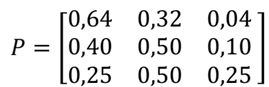

In [2]:
import numpy as np

def find_stationary_distribution(P, max_iter=1000, tol=1e-6):
    """
    Tìm phân phối dừng của xích Markov.
    
    Parameters:
    - P: Ma trận xác suất chuyển.
    - max_iter: Số lần lặp tối đa.
    - tol: Ngưỡng sai số để kiểm tra hội tụ.

    Returns:
    - pi: Phân phối dừng.
    - n_steps: Số bước cần để hội tụ.
    """
    # Giải hệ phương trình πP = π với điều kiện sum(π) = 1
    n = P.shape[0]
    A = np.vstack([P.T - np.eye(n), np.ones(n)])
    b = np.array([0] * n + [1])
    pi = np.linalg.lstsq(A, b, rcond=None)[0]  # Phân phối dừng
    
    # Kiểm tra thời gian hội tụ
    pi_current = np.zeros(n)  # Phân phối khởi tạo
    pi_current[0] = 1  # Giả sử bắt đầu từ trạng thái 1
    for n_steps in range(1, max_iter + 1):
        pi_next = np.dot(pi_current, P)
        if np.linalg.norm(pi_next - pi_current) < tol:
            return pi, n_steps  # Hội tụ
        pi_current = pi_next
    return pi, None  # Không hội tụ trong max_iter bước

# Ma trận xác suất chuyển
P = np.array([
    [0.64, 0.32, 0.04],
    [0.40, 0.50, 0.10],
    [0.25, 0.50, 0.25]
])

# Tính toán
stationary_distribution, steps = find_stationary_distribution(P)

print("Phân phối dừng:", stationary_distribution)
if steps:
    print(f"Xích Markov hội tụ sau {steps} bước.")
else:
    print("Xích Markov không hội tụ trong số bước lặp tối đa.")


Phân phối dừng: [0.51020408 0.40816327 0.08163265]
Xích Markov hội tụ sau 12 bước.
